In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\airline-passenger-traffic+(1).csv")

In [3]:
df

,1949-01,112
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0
...,...,...
138,1960-08,606.0
139,1960-09,508.0
140,1960-10,461.0
141,1960-11,390.0


In [4]:
df.columns = ['Month','Passenger']
df['Month'] = pd.to_datetime(df['Month'],format="%Y-%m")
df = df.set_index('Month')

In [5]:
df.head(10)

,Passenger
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0
1949-10-01,119.0


## Time Series Analysis

### Plotting time series data

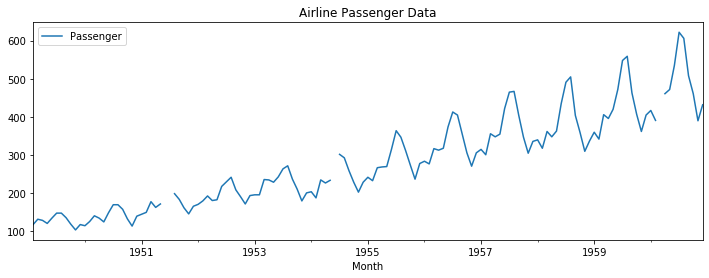

In [6]:
df.plot(figsize=(12,4))
plt.title("Airline Passenger Data")
plt.legend(loc='best')
plt.show()

### Missing Value Treatment

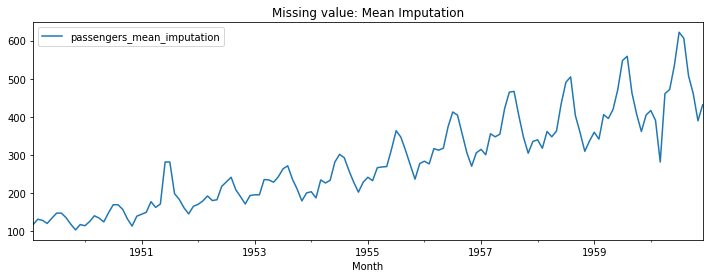

In [7]:
# Mean Impuation
df = df.assign(passengers_mean_imputation = df['Passenger'].fillna(df['Passenger'].mean()))
df[['passengers_mean_imputation']].plot(figsize=(12,4))
plt.title("Missing value: Mean Imputation")
plt.legend(loc='best')
plt.show(block=False)

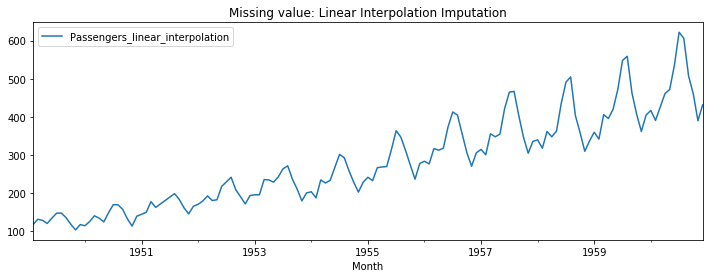

In [8]:
# Linear Interpolation
df = df.assign(Passengers_linear_interpolation = df['Passenger'].interpolate(method = 'linear'))
df[['Passengers_linear_interpolation']].plot(figsize=(12,4))
plt.title("Missing value: Linear Interpolation Imputation")
plt.legend(loc='best')
plt.show(block=False)

In [9]:
df['Passenger'] = df['Passengers_linear_interpolation']

### Outliers Detection

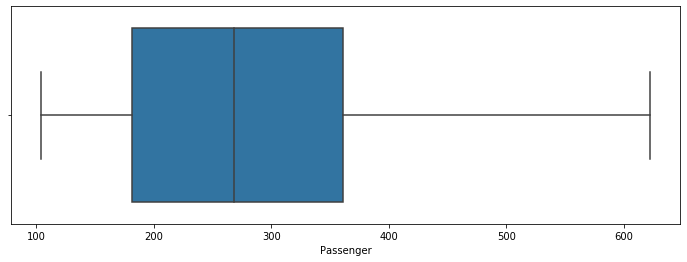

In [10]:
# Box lot and interquartile range
fig = plt.subplots(figsize = (12,4))
ax = sns.boxplot(x =df['Passenger'], whis = 1.5)

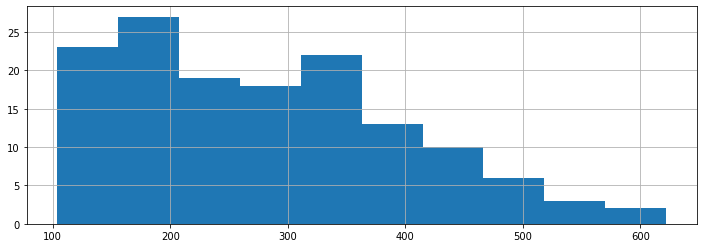

In [11]:
# Histogram
fig = df['Passenger'].hist(figsize=(12,4))

## Time Series Decomposition

### Additive Seasonal Decomposition

In [12]:
from pylab import rcParams
import statsmodels.api as sm

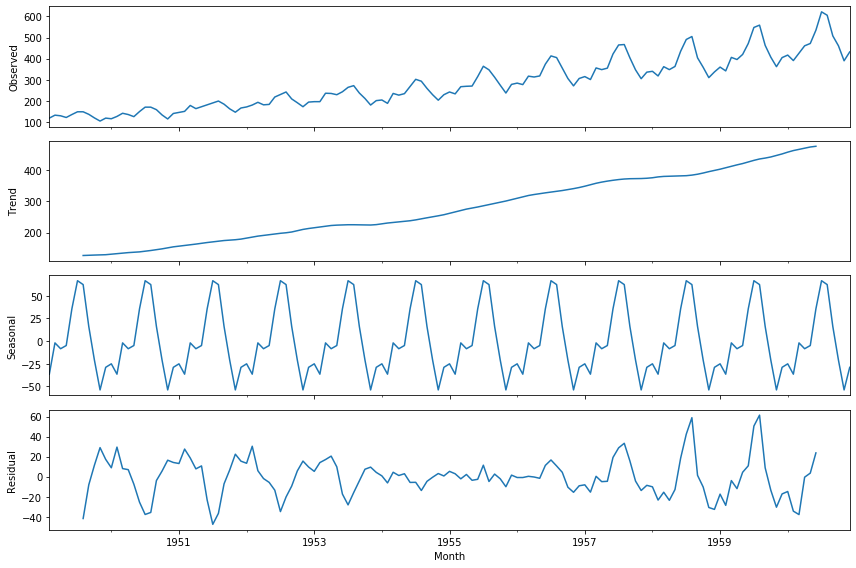

In [13]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Passenger'],model='additive')
fig = decomposition.plot()
plt.show()

### Multiplicative Seasonal Decomposition 

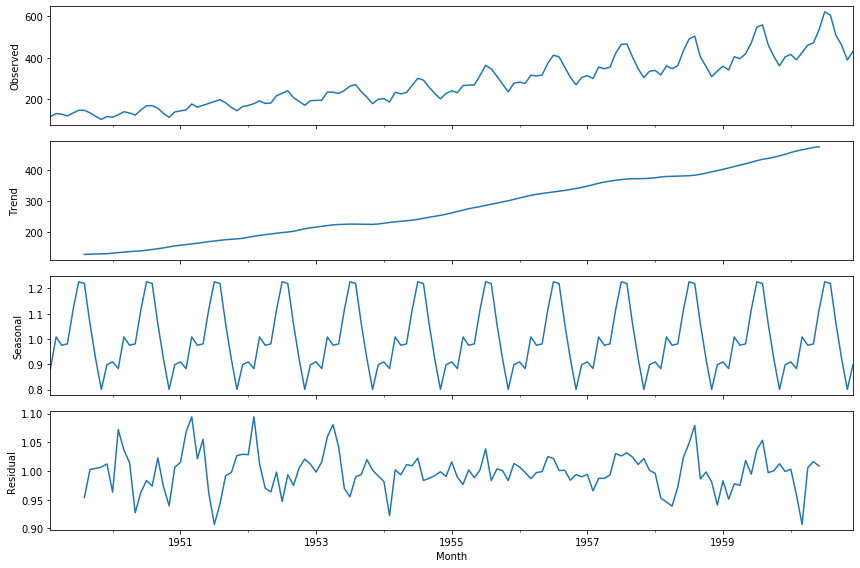

In [14]:
decomposition = sm.tsa.seasonal_decompose(df['Passenger'],model = 'multiplicative')
fig = decomposition.plot()
plt.show()

## Building and Evaluate Time Series Forecast Model

### Splitting into test and train sets

In [15]:
train_len = 120
train = df[0:train_len]
test = df[train_len:]

### Naive Method

In [16]:
y_hat_naive = test.copy()
y_hat_naive['Naive_Forecast'] = train['Passenger'][train_len-1]

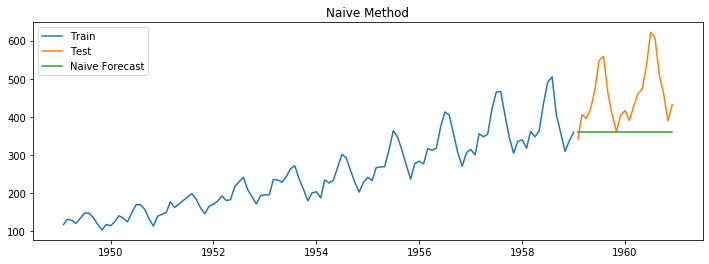

In [17]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_naive['Naive_Forecast'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [18]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Passenger"], y_hat_naive['Naive_Forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Passenger']-y_hat_naive['Naive_Forecast'])/test['Passenger'])*100,2)

### Simple Average Method

In [19]:
y_hat_avg = test.copy()
y_hat_avg['Average_Forecast'] = train['Passenger'].mean()

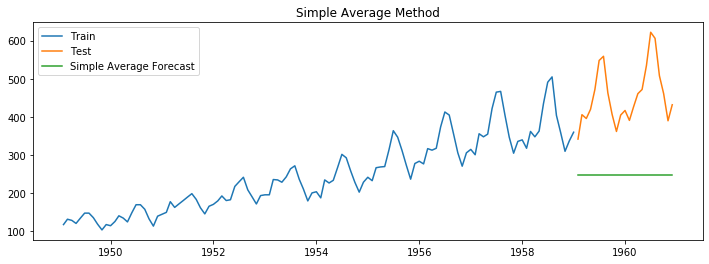

In [20]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_avg['Average_Forecast'],label = 'Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [21]:
#RMSE
rmse_sa = np.sqrt(mean_squared_error(test["Passenger"], y_hat_avg['Average_Forecast'])).round(2)
#MAPE
mape_sa = np.round(np.mean(np.abs(test['Passenger']-y_hat_avg['Average_Forecast'])/test['Passenger'])*100,2)

In [22]:
results = pd.DataFrame({"Methods":['Naive Method','Simple Average'],"MAPE":[mape,mape_sa],'RMSE':[rmse,rmse_sa]})
results

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.4
1,Simple Average,44.36,221.2


### Simpe Moving Average Method

In [23]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['SMA_Forecast'] = df['Passenger'].rolling(ma_window).mean()
y_hat_sma['SMA_Forecast'][train_len:] = y_hat_sma['SMA_Forecast'][train_len-1]

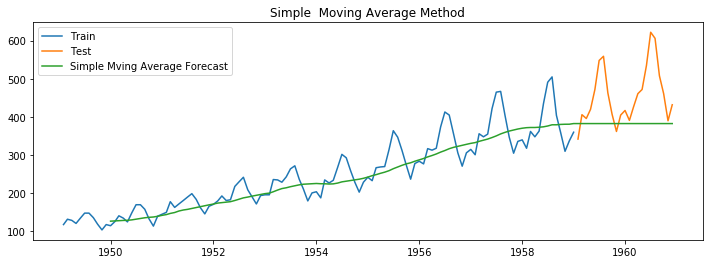

In [24]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_sma['SMA_Forecast'],label = 'Simple Mving Average Forecast')
plt.legend(loc='best')
plt.title("Simple  Moving Average Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [25]:
#RMSE
rmse_sma = np.sqrt(mean_squared_error(test["Passenger"], y_hat_sma['SMA_Forecast'][train_len:])).round(2)
#MAPE
mape_sma = np.round(np.mean(np.abs(test['Passenger']-y_hat_sma['SMA_Forecast'][train_len:])/test['Passenger'])*100,2)

tempresults = pd.DataFrame({"Methods":['Simple Moving Average Method'],"MAPE":[mape_sma],'RMSE':[rmse_sma]})
result = pd.concat([results,tempresults])

In [26]:
result

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28


### SImple Exponential Smoothing Method


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
model = SimpleExpSmoothing(train['Passenger'])
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['SES_Forecast'] = model_fit.forecast(24)

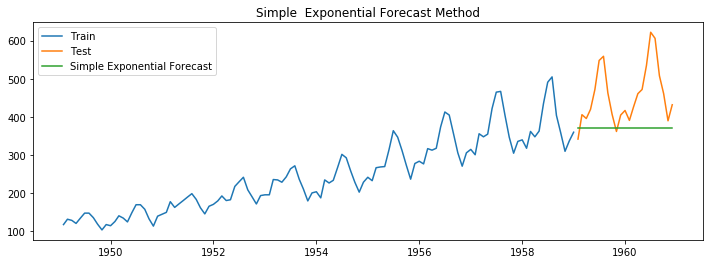

In [29]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_ses['SES_Forecast'],label = 'Simple Exponential Forecast')
plt.legend(loc='best')
plt.title("Simple  Exponential Forecast Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [58]:
#RMSE
rmse_ses = np.sqrt(mean_squared_error(test["Passenger"], y_hat_ses['SES_Forecast'])).round(2)
#MAPE
mape_ses = np.round(np.mean(np.abs(test['Passenger']-y_hat_ses['SES_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['Simple Exponential Smoothing Method'],"MAPE":[mape_ses],'RMSE':[rmse_ses]})
result1 = pd.concat([result,tempresults1])
result1

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15


## Holt's Exponential Smoothing Method using trends

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
np.asarray(train['Passenger'])

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
       115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
       140., 145., 150., 178., 163., 172., 181., 190., 199., 184., 162.,
       146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
       191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
       237., 211., 180., 201., 204., 188., 235., 227., 234., 268., 302.,
       293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
       364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
       374., 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
       355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362.,
       348., 363., 435., 491., 505., 404., 359., 310., 337., 360.])

In [66]:
model = ExponentialSmoothing(np.asarray(train['Passenger']),seasonal_periods = 12,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()

y_hat_holt['HOLT_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 118.0, 'initial_slope': 14.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


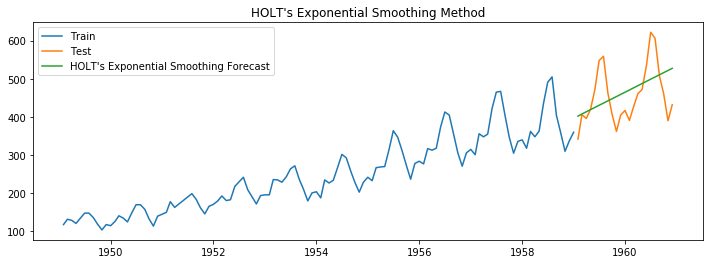

In [67]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_holt['HOLT_Forecast'],label = 'HOLT\'s Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT\'s Exponential Smoothing Method")
plt.show()

In [47]:
#RMSE
rmse_holt = np.sqrt(mean_squared_error(test["Passenger"], y_hat_holt['HOLT_Forecast'])).round(2)
#MAPE
mape_holt = np.round(np.mean(np.abs(test['Passenger']-y_hat_holt['HOLT_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT\'s Exponential Smoothing Method'],"MAPE":[mape_holt],'RMSE':[rmse_holt]})
result2 = pd.concat([result1,tempresults1])
result2

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27


## Holt-Winters Additive Method with Trend and Seasonality

In [49]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passenger']), seasonal_periods = 12, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwa['HWA_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.26315789253486876, 'smoothing_slope': 0.05053479831399255, 'smoothing_seasonal': 0.7368421030611846, 'damping_slope': nan, 'initial_level': 206.84462792649353, 'initial_slope': 2.094327161015531, 'initial_seasons': array([ -90.22522905,  -76.40603275,  -79.66930323,  -87.75806009,
        -73.74482772,  -60.81774343,  -61.01333028,  -73.21638117,
        -90.37116943, -105.25649857,  -90.91910945,  -93.85787533]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


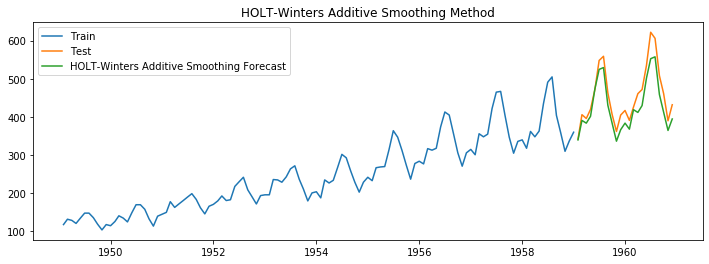

In [50]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_hwa['HWA_Forecast'],label = 'HOLT-Winters Additive Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Additive Smoothing Method")
plt.show()

In [59]:
#RMSE
rmse_hwa = np.sqrt(mean_squared_error(test["Passenger"], y_hat_hwa['HWA_Forecast'])).round(2)
#MAPE
mape_hwa = np.round(np.mean(np.abs(test['Passenger']-y_hat_hwa['HWA_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Additive Smoothing Method'],"MAPE":[mape_hwa],'RMSE':[rmse_hwa]})
result3 = pd.concat([result2,tempresults1])
result3

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT-Winters Additive Smoothing Method,6.37,34.13


## Holt-Winters Multiplicative Method with Trend and Seasonality

In [52]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passenger']), seasonal_periods = 12, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwm['HWM_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.26315789253486876, 'smoothing_slope': 0.05053479831399255, 'smoothing_seasonal': 0.7368421030611846, 'damping_slope': nan, 'initial_level': 206.84462792649353, 'initial_slope': 2.094327161015531, 'initial_seasons': array([ -90.22522905,  -76.40603275,  -79.66930323,  -87.75806009,
        -73.74482772,  -60.81774343,  -61.01333028,  -73.21638117,
        -90.37116943, -105.25649857,  -90.91910945,  -93.85787533]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


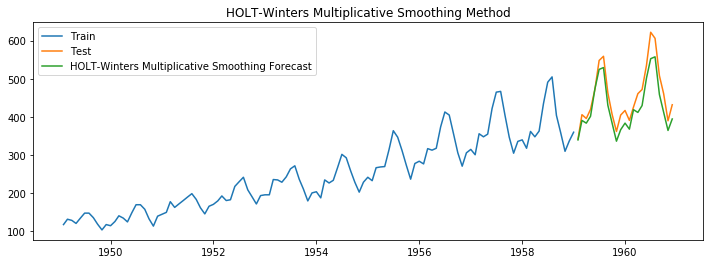

In [54]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_hwm['HWM_Forecast'],label = 'HOLT-Winters Multiplicative Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Multiplicative Smoothing Method")
plt.show()

In [60]:
#RMSE
rmse_hwm = np.sqrt(mean_squared_error(test["Passenger"], y_hat_hwm['HWM_Forecast'])).round(2)
#MAPE
mape_hwm = np.round(np.mean(np.abs(test['Passenger']-y_hat_hwm['HWM_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Multiplicative Smoothing Method'],"MAPE":[mape_hwm],'RMSE':[rmse_hwm]})
result4 = pd.concat([result3,tempresults1])
result4

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
